# Reading Data

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

resorce_data=pd.read_csv('D:\\resources.csv')
train_data=pd.read_csv('D:\\train.csv')

print("Resource_Data_columns:\n",resorce_data.columns)
print(resorce_data.shape)
print(resorce_data.head(2))
print("Train_Data_columns:\n",train_data.columns)
print(train_data.shape)
print(train_data.head(2))

Resource_Data_columns:
 Index(['id', 'description', 'quantity', 'price'], dtype='object')
(1541272, 4)
        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95  
Train_Data_columns:
 Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
(182080, 16)
        id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3b

# PreProcesing project_grade_category  


In [81]:
print(train_data['project_grade_category'].value_counts())

preprocessed_project_grade_categories= []
 
for grade_cat in tqdm(train_data["project_grade_category"]):
    
    grade_cat = grade_cat.replace('-', '_')  #Replacing(-) with(_)
    grade_cat = grade_cat.replace('Grades', '') #Removing grades as it is redundant
    #print(grade_cat)
    grad_cat = ' '.join(f for f in grade_cat.split())
    preprocessed_project_grade_categories.append(grad_cat.strip())
train_data['preprocessed_project_grade_categories']=preprocessed_project_grade_categories
print(preprocessed_project_grade_categories[1:5])

Grades PreK-2    73890
Grades 3-5       61682
Grades 6-8       28197
Grades 9-12      18311
Name: project_grade_category, dtype: int64


100%|██████████████████████████████████████████████████████████████████████| 182080/182080 [00:00<00:00, 556860.34it/s]


['3_5', '3_5', '3_5', '6_8']


# PreProcesing project_subject_categories 

In [82]:
catogories = list(train_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

train_data['clean_categories'] = cat_list
train_data.drop(['project_subject_categories'], axis=1, inplace=True)
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,preprocessed_project_grade_categories,clean_categories
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,PreK_2,Literacy_Language
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,3_5,Music_Arts Health_Sports


In [83]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
counter = Counter()
for word in train_data['clean_categories'].values:
    counter.update(word.split())
print(counter)

cat_dict = dict(counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)

Counter({'Literacy_Language': 86988, 'Math_Science': 69248, 'Health_Sports': 23712, 'SpecialNeeds': 22881, 'AppliedLearning': 20303, 'Music_Arts': 17054, 'History_Civics': 9726, 'Warmth': 2327, 'Care_Hunger': 2327})
{'Warmth': 2327, 'Care_Hunger': 2327, 'History_Civics': 9726, 'Music_Arts': 17054, 'AppliedLearning': 20303, 'SpecialNeeds': 22881, 'Health_Sports': 23712, 'Math_Science': 69248, 'Literacy_Language': 86988}


# PreProcesing project_subject_subcategories 

In [84]:
sub_catogories = list(train_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
    
train_data['clean_sub_categories'] = sub_cat_list
#train_data.head(10)
train_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,preprocessed_project_grade_categories,clean_categories,clean_sub_categories
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,PreK_2,Literacy_Language,Literacy
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,3_5,Music_Arts Health_Sports,PerformingArts TeamSports


In [85]:
my_counter = Counter()
for word in train_data['clean_sub_categories'].values:
    my_counter.update(word.split())
print(my_counter)

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_sub_cat_dict)

Counter({'Literacy': 56066, 'Mathematics': 46884, 'Literature_Writing': 36974, 'SpecialNeeds': 22881, 'AppliedSciences': 17966, 'Health_Wellness': 17099, 'VisualArts': 10399, 'EnvironmentalScience': 9436, 'Gym_Fitness': 7592, 'Health_LifeScience': 7175, 'ESL': 7162, 'EarlyDevelopment': 7149, 'History_Geography': 5258, 'Music': 5172, 'College_CareerPrep': 4291, 'Other': 3948, 'TeamSports': 3643, 'CharacterEducation': 3519, 'PerformingArts': 3223, 'SocialSciences': 3149, 'Warmth': 2327, 'Care_Hunger': 2327, 'NutritionEducation': 2236, 'ForeignLanguages': 1496, 'Extracurricular': 1332, 'Civics_Government': 1294, 'ParentInvolvement': 1103, 'FinancialLiteracy': 956, 'CommunityService': 712, 'Economics': 431})
{'Economics': 431, 'CommunityService': 712, 'FinancialLiteracy': 956, 'ParentInvolvement': 1103, 'Civics_Government': 1294, 'Extracurricular': 1332, 'ForeignLanguages': 1496, 'NutritionEducation': 2236, 'Warmth': 2327, 'Care_Hunger': 2327, 'SocialSciences': 3149, 'PerformingArts': 3223

# PreProcesing teacher_prefix

In [86]:
train_data['teacher_prefix'] = train_data['teacher_prefix'].fillna('null')

def replace_dot(strval):          # Removing (.) in Mrs. 
    return strval.replace('.','')
   

train_data['teacher_prefix']= train_data['teacher_prefix'].astype(str).apply(replace_dot)

preprocessed_teacher_prefix = []

for teach_prefix in tqdm(train_data["teacher_prefix"]):
    
    preprocessed_teacher_prefix.append(teach_prefix.strip())
    
train_data.teacher_prefix.value_counts()

100%|█████████████████████████████████████████████████████████████████████| 182080/182080 [00:00<00:00, 2092463.26it/s]


Mrs        95405
Ms         65066
Mr         17667
Teacher     3912
Dr            26
null           4
Name: teacher_prefix, dtype: int64

# Adding a new feature Number of words in title

In [87]:
title_word_count = []

for title in train_data["project_title"] :
    length = len(title.split())
    title_word_count.append(length)

train_data["title_word_count"] = title_word_count
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,preprocessed_project_grade_categories,clean_categories,clean_sub_categories,title_word_count
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,PreK_2,Literacy_Language,Literacy,4
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,3_5,Music_Arts Health_Sports,PerformingArts TeamSports,5


# Merging project_essays into one

In [88]:
# merge four column essay text dataframe: 
train_data['essay'] = train_data['project_essay_1'].map(str) +\
                        train_data['project_essay_2'].map(str) + \
                        train_data['project_essay_3'].map(str) + \
                        train_data['project_essay_4'].map(str)

#Adding a new feature Number of words in essay
essay_word_count=[]

for essay in train_data["essay"] :
    length = len(essay.split())
    essay_word_count.append(length)
    
train_data["essay_word_count"] = essay_word_count

train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,preprocessed_project_grade_categories,clean_categories,clean_sub_categories,title_word_count,essay,essay_word_count
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,PreK_2,Literacy_Language,Literacy,4,Most of my kindergarten students come from low...,311
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,3_5,Music_Arts Health_Sports,PerformingArts TeamSports,5,Our elementary school is a culturally rich sch...,189


# Train ,Test  Data spliting

In [89]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_data['project_is_approved'], test_size=0.33, stratify = train_data['project_is_approved'],random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

D:\Python1\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Text PreProcessing

In [90]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

print(train_data['essay'].values[0])

sent = decontracted(train_data['essay'].values[0])
print(sent)
print("___________"*10)
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

sent = re.sub('[^A-Za-z0-9]+', ' ', sent)



Most of my kindergarten students come from low-income households and are considered \"at-risk\". These kids walk to school alongside their parents and most have never been further than walking distance from their house. For 80% of my students, English is not their first language or the language spoken at home. \r\n\r\nWhile my kindergarten kids have many obstacles in front of them, they come to school each day excited and ready to learn. Most students started the year out never being in a school setting. At the start of the year many had never been exposed to letters. Each day they soak up more knowledge and try their hardest to succeed. They are highly motivated to learn new things every day. We are halfway through the year and they are starting to take off. They know know all letters, some sight words, numbers to 20, and a majority of their letter sounds because of their hard work and determination. I am excited to see the places we will go from here!I currently have a differentiated

In [91]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]



# PreProcessing X_train['essay']

In [92]:

preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 81735/81735 [00:44<00:00, 1825.93it/s]


# PreProcessing X_test['essay']

In [93]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 60087/60087 [00:33<00:00, 1769.76it/s]


# PreProcessing X_cv['essay']

In [94]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 40258/40258 [00:22<00:00, 1785.68it/s]


# PreProcessing project title(Train)

In [95]:
print(train_data['project_title'].values[5])
preprocessed_project_title_train=[]

for title in (X_train['project_title'].values):
    tilte =decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title =' '.join(word for word in title.split() if word not in stopwords)
    preprocessed_project_title_train.append(title.lower().strip())
print(preprocessed_project_title_train[5])

Need to Reach Our Virtual  Mentors!!!
classroom supplies room 205


# PreProcessing project title(Test)

In [96]:
preprocessed_project_title_test=[]

for title in (X_test['project_title'].values):
    tilte =decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title =' '.join(word for word in title.split() if word not in stopwords)
    preprocessed_project_title_test.append(title.lower().strip())
print(preprocessed_project_title_test[5])

picture this


# PreProcessing project title(CV)

In [97]:
preprocessed_project_title_cv=[]

for title in (X_cv['project_title'].values):
    tilte =decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title =' '.join(word for word in title.split() if word not in stopwords)
    preprocessed_project_title_cv.append(title.lower().strip())
print(preprocessed_project_title_cv[5])

art plus math equals interactive notebooks


# Preparing data for models

# one hot encoding for clean_categories of Projects (train,test,cv)

In [98]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['clean_categories'].values)

print(vectorizer.get_feature_names())

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)

print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (81735, 9)
Shape of matrix after one hot encodig  (60087, 9)
Shape of matrix after one hot encodig  (40258, 9)


# one hot encoding for clean_sub_categories of Projects (train,test,cv)

In [99]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['clean_sub_categories'].values)

sub_categories_one_hot_train = vectorizer.transform(X_train['clean_sub_categories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_sub_categories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_sub_categories'].values)


print(vectorizer.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'ESL', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (81735, 30)
Shape of matrix of Test data after one hot encoding  (60087, 30)
Shape of matrix of Cross Validation data after one hot encoding  (40258, 30)


# one hot encoding for school_state of Projects (train,test,cv)

In [100]:

#One Hot Encode - School States
my_counter = Counter()
for state in train_data['school_state'].values:
    my_counter.update(state.split())

school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))


vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['school_state'].values)

print(vectorizer.get_feature_names())

school_state_categories_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

school_state_categories_one_hot_train.toarray()[1]

['VT', 'WY', 'ND', 'MT', 'RI', 'NE', 'SD', 'AK', 'NH', 'DE', 'ME', 'WV', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'UT', 'TN', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'LA', 'MA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding  (81735, 51)
Shape of matrix of Test data after one hot encoding  (60087, 51)
Shape of matrix of Cross Validation data after one hot encoding  (40258, 51)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

# one hot encoding for project_grade_category of Projects (train,test,cv)

In [101]:


#One Hot Encode - Project Grade Category
my_counter = Counter()
for project_grade in train_data['preprocessed_project_grade_categories'].values:
    my_counter.update(project_grade.split())
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(train_data['preprocessed_project_grade_categories'].values)
print(vectorizer.get_feature_names())

project_grade_categories_one_hot_train = vectorizer.transform(X_train['preprocessed_project_grade_categories'].values)
project_grade_categories_one_hot_test = vectorizer.transform(X_test['preprocessed_project_grade_categories'].values)
project_grade_categories_one_hot_cv = vectorizer.transform(X_cv['preprocessed_project_grade_categories'].values)

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['9_12', '6_8', '3_5', 'PreK_2']
Shape of matrix of Train data after one hot encoding  (81735, 4)
Shape of matrix of Test data after one hot encoding  (60087, 4)
Shape of matrix of Cross Validation data after one hot encoding  (40258, 4)


# one hot encoding for teacher_prefix of Projects (train,test,cv)

In [102]:
#One Hot Encode - Teacher Prefix


vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
print(vectorizer.get_feature_names())

# we use the fitted CountVectorizer to convert the text to vector
teacher_prefix_categories_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print("Shape of matrix of Train data after one hot encoding",teacher_prefix_categories_one_hot_train.shape, y_train.shape)
print("Shape of matrix of cv data after one hot encoding",teacher_prefix_categories_one_hot_cv.shape, y_cv.shape)
print("Shape of matrix of Test data after one hot encoding",teacher_prefix_categories_one_hot_test.shape, y_test.shape)

['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']
After vectorizations
Shape of matrix of Train data after one hot encoding (81735, 6) (81735,)
Shape of matrix of cv data after one hot encoding (40258, 6) (40258,)
Shape of matrix of Test data after one hot encoding (60087, 6) (60087,)


# Vectorizing BOW(preprocessed_essays_train)

In [103]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)
text_bow_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig train ",text_bow_train.shape)

Shape of matrix after one hot encodig train  (81735, 5000)


# BOW(preprocessed_essays_test)

In [104]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)
text_bow_test = vectorizer.fit_transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig test  ",text_bow_test.shape)

Shape of matrix after one hot encodig test   (60087, 5000)


# BOWpreprocessed_essays_cv)

In [105]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)
text_bow_cv = vectorizer.fit_transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encodig cv ",text_bow_cv.shape)

Shape of matrix after one hot encodig cv  (40258, 5000)


# BOW(preprocessed_titles_train)

In [106]:
# vectorizer.fit(preprocessed_titles_train)
title_bow_train = vectorizer.transform(preprocessed_project_title_train)
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (81735, 5000)


# BOW(preprocessed_titles_test)

In [107]:
title_bow_test = vectorizer.transform(preprocessed_project_title_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (60087, 5000)


# BOW(preprocessed_titles_cv)

In [108]:
title_bow_cv = vectorizer.transform(preprocessed_project_title_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (40258, 5000)


# TF-IDF(preprocessed_essays_train)

In [109]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,max_features=5000) #Considering top 5000 features
vectorizer.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (81735, 5000)


# TF-IDF(preprocessed_essays_test)

In [110]:
text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (60087, 5000)


# TF-IDF(preprocessed_essays_cv)

In [111]:
text_tfidf_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (40258, 5000)


# TF-IDF(preprocessed_project_title_train)

In [112]:
vectorizer = TfidfVectorizer(min_df=10)

vectorizer.fit(preprocessed_project_title_train)
title_tfidf_train = vectorizer.transform(preprocessed_project_title_train)
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (81735, 2784)


# TF-IDF(preprocessed_project_title_test)

In [113]:
title_tfidf_test = vectorizer.transform(preprocessed_project_title_test)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (60087, 2784)


# TF-IDF(preprocessed_project_title_cv)

In [114]:
title_tfidf_cv = vectorizer.transform(preprocessed_project_title_cv)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (40258, 2784)


In [41]:

def loadGloveModel(gloveFile):
    
    print ("Loading Glove Model")
    
    f = open(gloveFile,'r', encoding = 'utf8')
    
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    
    print ("Done.",len(model)," words loaded!")
    
    return model

In [42]:

model = loadGloveModel('D:\\glove.42B.300d.txt')


Loading Glove Model


1917494it [04:29, 7103.06it/s]


Done. 1917494  words loaded!


# Vectorizing Numerical features

In [115]:
print(resorce_data.head(3))

price_data = resorce_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   

    price  
0  149.00  
1   14.95  
2    8.45  


,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [116]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [117]:

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)
print(price_test[1:10])

After vectorizations
(81735, 1) (81735,)
(40258, 1) (40258,)
(60087, 1) (60087,)
[[-0.64895639]
 [-0.73455901]
 [-0.04759115]
 [-0.51971001]
 [ 0.41224441]
 [ 0.59722761]
 [-0.77899085]
 [-0.74542919]
 [-0.55166832]]


In [118]:
normalizer = StandardScaler()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)
print(quantity_test[1:10])

D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(81735, 1) (81735,)
(40258, 1) (40258,)
(60087, 1) (60087,)
[[-0.38073587]
 [-0.41926325]
 [-0.496318  ]
 [-0.53484537]
 [-0.61190012]
 [-0.38073587]
 [ 1.85385186]
 [ 0.04306525]
 [ 0.89066749]]


In [119]:
normalizer = StandardScaler()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)
print(prev_projects_train[1])

D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(81735, 1) (81735,)
(40258, 1) (40258,)
(60087, 1) (60087,)
[-0.11496503]


In [120]:
normalizer = StandardScaler()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)
print(title_word_count_train[1:10])

D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(81735, 1) (81735,)
(40258, 1) (40258,)
(60087, 1) (60087,)
[[ 0.40944496]
 [-0.54117169]
 [ 0.88475328]
 [-0.54117169]
 [-0.06586336]
 [ 0.40944496]
 [-1.01648001]
 [-1.01648001]
 [-0.54117169]]


In [121]:
normalizer = StandardScaler()

normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

print(essay_word_count_train[1:10])

D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Python1\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(81735, 1) (81735,)
(40258, 1) (40258,)
(60087, 1) (60087,)
[[ 0.15438296]
 [-0.39618138]
 [ 0.67436038]
 [-0.80910463]
 [ 0.68965384]
 [-0.90086535]
 [-0.97733262]
 [-1.14556061]
 [ 0.64377348]]


# K-NN

In [122]:
# Code snippet taken from here: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, 
               project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, 
               quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, 
               text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test,
               project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test,
               quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test,
               text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, 
               project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, 
               quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, 
               text_bow_cv)).tocsr()

In [123]:
print("Final Data matrix")   #Printing shape of all 3 matrices
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(81735, 10105) (81735,)
(40258, 10105) (40258,)
(60087, 10105) (60087,)


# K-nn BruteForce

In [124]:

def batch_predict(clf, data):
    # In case of roc_auc_score(y_true, y_score) the y_score should be probability estimates of the positive class
    # not the predicted outputs for the positive class
    
    #Predicting outputs in batches 

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

[0.9090909090909091, 0.8181818181818182, 0.5454545454545454, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.7272727272727273, 0.6363636363636364, 0.8181818181818182]


 20%|████████████████▏                                                                | 1/5 [16:08<1:04:32, 968.10s/it]

[0.8387096774193549, 0.6451612903225806, 0.7096774193548387, 0.7741935483870968, 0.8387096774193549, 0.8064516129032258, 0.7096774193548387, 0.7741935483870968, 0.8709677419354839]


 40%|█████████████████████████████████▏                                                 | 2/5 [32:00<48:10, 963.46s/it]

[0.7843137254901961, 0.7058823529411765, 0.7647058823529411, 0.803921568627451, 0.8627450980392157, 0.8235294117647058, 0.7254901960784313, 0.7647058823529411, 0.8627450980392157]


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [47:55<32:01, 960.96s/it]

[0.8169014084507042, 0.6901408450704225, 0.7887323943661971, 0.8309859154929577, 0.8028169014084507, 0.8450704225352113, 0.7605633802816901, 0.7605633802816901, 0.8450704225352113]


 80%|████████████████████████████████████████████████████████████████▊                | 4/5 [1:03:42<15:56, 956.53s/it]

[0.8235294117647058, 0.6823529411764706, 0.7764705882352941, 0.8470588235294118, 0.8117647058823529, 0.8588235294117647, 0.7764705882352941, 0.7529411764705882, 0.8235294117647058]


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [1:19:25<00:00, 953.11s/it]


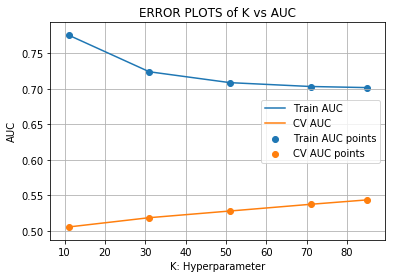

In [125]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [ 11, 31, 51, 71,85]

for i in tqdm(K):
    neigh  = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)
    print(y_train_pred[1:10])
    y_cv_pred = batch_predict(neigh, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of K vs AUC")
plt.grid()
plt.show()

# k-nn using GridSearchCV

In [126]:
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors':[11,31,51, 71, 85]}


#return_train_score needs to be set True

clf = GridSearchCV(neigh, parameters, cv=2 , scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] n_neighbors=11 ..................................................


MemoryError: Unable to allocate array with shape (1670152556,) and data type float64